# Lecture 2: Time Series and Stock Movements

**Introduction to Quantitative Methods in Finance**

**The Erdös Institute**

### Access to Data
Quantitative methods is the process of harnessing data to derive meaningful insights to make informed decisions.

**Important Remark**: Meaningful insight cannot be made without access to meaningful data.

### Understanding Time Series

A time series is a sequence of data points collected or recorded at specific time intervals. In the context of finance, it represents historical price or return data of a financial instrument, such as a stock, bond, or commodity. Time series analysis is a fundamental tool for quantitative researchers, as it allows us to gain insights into past price movements and make informed predictions about future trends.

### Geometric Brownian Motion (GBM)

Stock price movements are often assumed to follow Geometric Brownian Motion, a mathematical model that describes the stochastic (random) behavior of asset prices over time. GBM is a cornerstone of quantitative finance and serves as the foundation for various financial models, including the famous Black-Scholes model for option pricing.

In simple terms, GBM describes how a stock's price changes over time due to two main factors: drift and volatility. The drift represents the average rate of return or growth of the stock, while volatility accounts for the random fluctuations in price.

In [6]:
#Import Packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

# Using `yfinance` for Historical Price Data

## Introduction

`yfinance` is a popular Python library that provides easy access to historical financial data, including stock price movements, dividends, and more. It's a fantastic resource for educational purposes and research, allowing you to retrieve historical data for analysis and modeling. Data provided by `yfinance` is limited to Level 1 Data (stock prices, trading volume, bid-ask spreads, and other essential data points) but does not provide Level 2 Data (more detailed market depth information critical for well-informed trading strategies). It is advisable to not use decisions based upon analysis of data provided by `yfinance` as it will sometimes contain non-accurate and non-detailed information, but it still works as an incredible free educational resource.

## Free Access to Historical Data

One of the key advantages of `yfinance` is that it offers free access to historical price data for a wide range of financial instruments, including stocks, ETFs, and indices. With just a few lines of code, you can retrieve daily, weekly, or monthly historical price data dating back several years.

## Tip for success 

Financial investment decsions should be made with sound reasoning after gaining access to useful data. An important and free resource are S.E.C. fillings, https://www.sec.gov/edgar/search/.

The sec-api allows retrivial of this data through python.

#### SEC Filings

**Definition**: SEC Filings, or Securities and Exchange Commission Filings, are official documents that publicly traded companies in the United States are required to submit to the U.S. Securities and Exchange Commission.

**Purpose**:
- Provide transparency to investors and the public.
- Ensure regulatory compliance.
- Protect investors by disclosing crucial information about a company.

**Access**: You can access SEC filings on the [SEC EDGAR Database](https://www.sec.gov/edgar/searchedgar/companysearch.html).

Publically traded companies typically required to submit their S.E.C. fillings on a quarterly basis. Form 10-Q provides updates on a company's financial performance and operations.

### Using `yfinance` 

In [7]:
#load two years of TSLA stock data
start_date = dt.datetime.today()-dt.timedelta(days = 365*2)
end_date = dt.datetime.today()

tsla_stock = yf.download('TSLA', start = start_date, end = end_date)
tsla_stock.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,251.000000,265.609985,250.300003,262.329987,262.329987,160210900
2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400
2024-07-11,263.299988,271.000000,239.649994,241.029999,241.029999,221707300
2024-07-12,235.800003,251.839996,233.089996,248.229996,248.229996,155694400
2024-07-15,255.970001,265.600006,251.729996,252.639999,252.639999,146423900


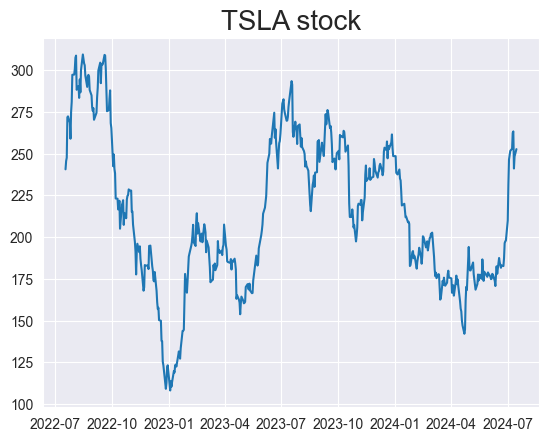

In [8]:
#plot TSLA stock data

plt.plot(tsla_stock['Adj Close'], label = 'TSLA')
plt.title('TSLA stock', size = 20)
plt.show()

[*********************100%%**********************]  1 of 1 completed


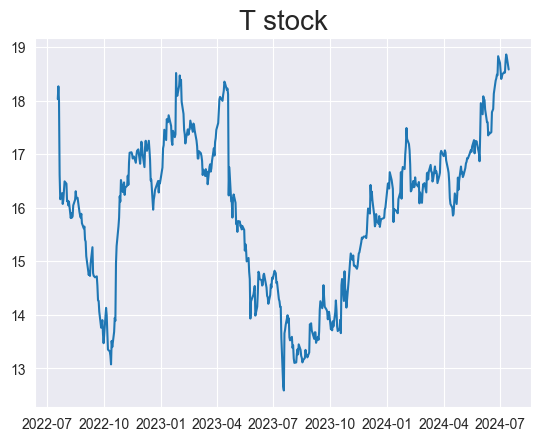

In [9]:
#plot AT&T stock data ticker symbol = "T"

t_stock = yf.download('T', start = start_date, end = end_date)

plt.plot(t_stock['Adj Close'], label = 'T')
plt.title('T stock', size = 20)
plt.show()

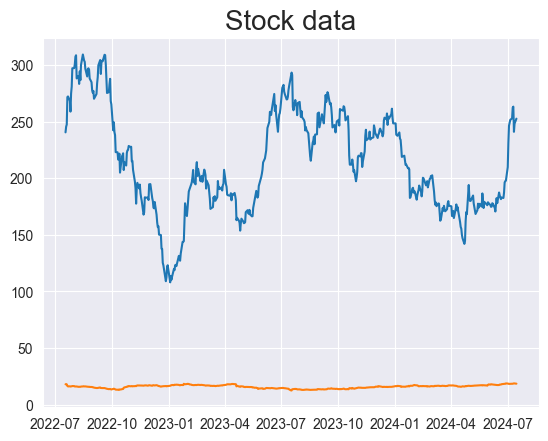

In [10]:
plt.plot(tsla_stock['Adj Close'], label = 'TSLA')
plt.plot(t_stock['Adj Close'], label = 'T')
plt.title('Stock data', size = 20)
plt.show()

In [ ]:
# So when comparing stock performances in a portfolio, we look not necessarily at the stock price, but of returns

/var/folders/y9/h1gp0h4s6hj68gv7rdh9l6tm0000gq/T/ipykernel_30797/2908494494.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot((tsla_stock['Adj Close']/tsla_stock['Adj Close'][0]-1)*100, label = 'TSLA')
/var/folders/y9/h1gp0h4s6hj68gv7rdh9l6tm0000gq/T/ipykernel_30797/2908494494.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot((t_stock['Adj Close']/t_stock['Adj Close'][0]-1)*100, label = 'T')


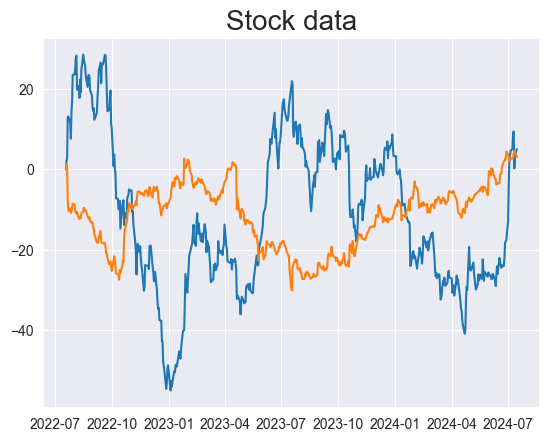

In [16]:
plt.plot((tsla_stock['Adj Close']/tsla_stock['Adj Close'][0]-1)*100, label = 'TSLA')
plt.plot((t_stock['Adj Close']/t_stock['Adj Close'][0]-1)*100, label = 'T')
plt.title('Stock data', size = 20)
plt.show()

The ability to explore data through visualization in Python is a valuable tool to exloring trends in time series.

Common data associated with a stocks price movements include 30-day moving averages and trade volume.

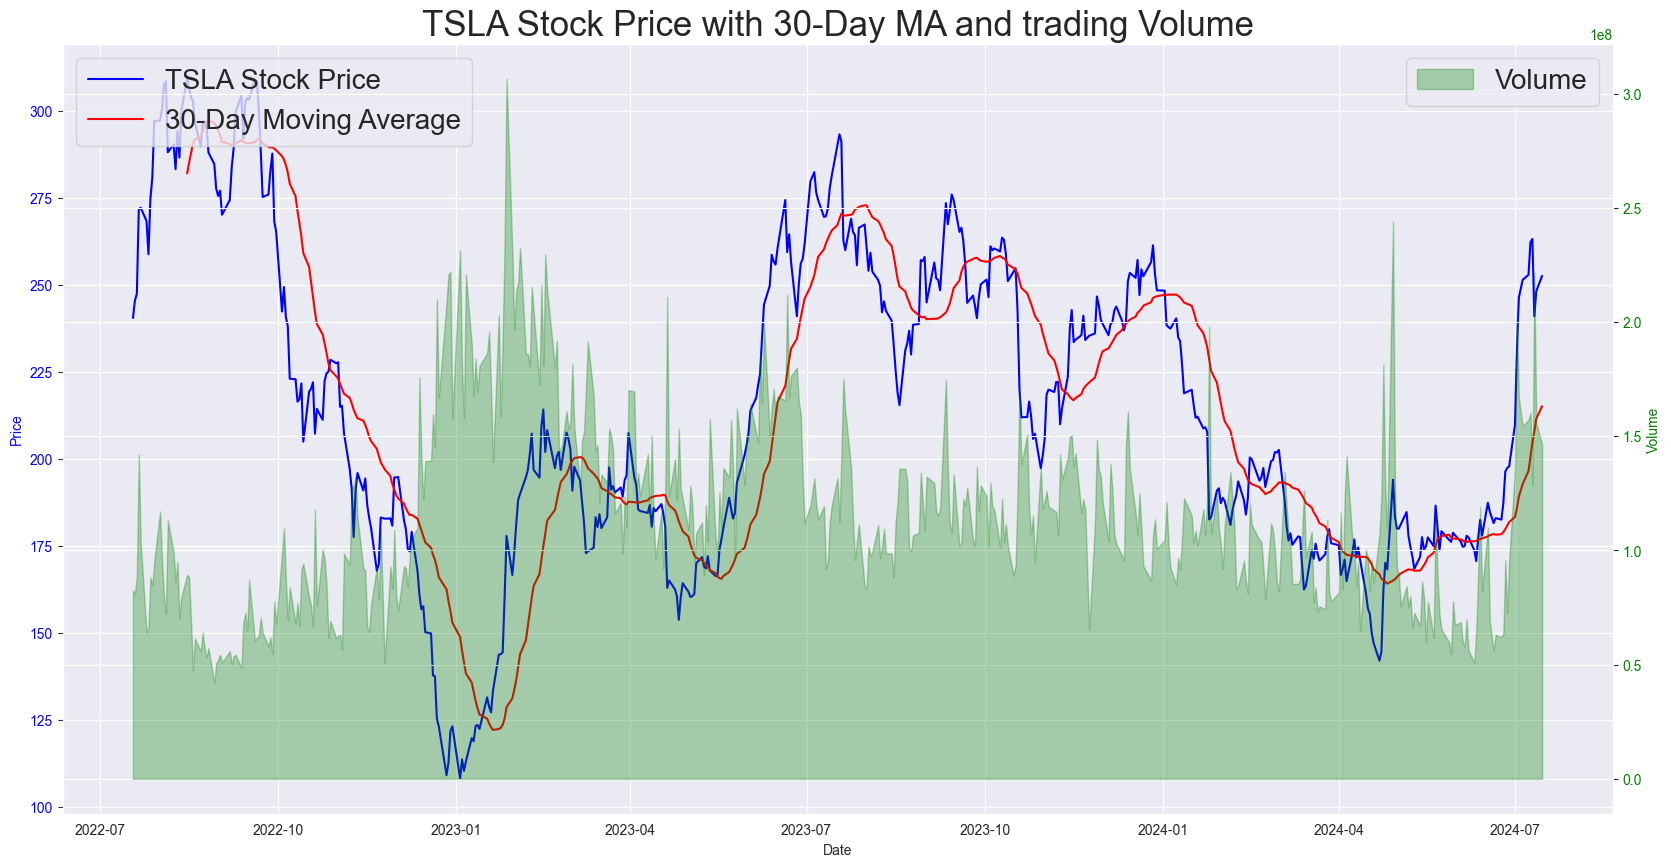

In [19]:
# Calculate the 30-day moving average for TSLA stock price, there are approximately 21 trading days in a month.
tsla_stock['30-Day MA'] = tsla_stock['Adj Close'].rolling(window = 21).mean()


# Data Visualization

fig, ax1 = plt.subplots(figsize=(20, 10)) 

# Plot the TSLA stock price on the left y-axis (ax1)
ax1.plot(tsla_stock.index, tsla_stock['Close'], color='b', label='TSLA Stock Price')
ax1.plot(tsla_stock.index, tsla_stock['30-Day MA'], color='r', label='30-Day Moving Average')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis (ax2) for volume data
ax2 = ax1.twinx()
ax2.fill_between(tsla_stock.index, 0, tsla_stock['Volume'], color='g', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='g')
ax2.tick_params(axis='y', labelcolor='g')



# Add a legend
ax1.legend(loc='upper left', fontsize = 20)
ax2.legend(loc='upper right', fontsize = 20)


# Set the title
plt.title('TSLA Stock Price with 30-Day MA and trading Volume', size=25)

# Show the plot
plt.show()


## Drift in Finance

**Definition:**

In finance and stochastic processes, "drift" refers to the average or expected rate of return or growth of an asset's value over time. It is a fundamental concept used in various financial models, including geometric Brownian motion (GBM) and the Black-Scholes-Merton model.

**Key Points:**

- **Directional Component:** Drift represents the directional component of an asset's price movement. It accounts for the average upward or downward trend in the asset's value, usually expressed as a percentage or rate.

- **Constant or Variable:** Drift can be either constant or variable. In many models, such as GBM, it is assumed to be constant over time. However, in reality, it can change due to factors like economic conditions, interest rates, and market sentiment.

- **Effect on Asset Pricing:** Drift plays a critical role in the pricing of various financial instruments, including options and bonds. It helps determine the expected return on an investment and influences the fair value of derivatives.

- **Risk-Free Rate:** In some models, the risk-free interest rate is used as the drift rate when calculating expected returns and option pricing. This reflects the opportunity cost of investing in a risk-free asset instead of the risky asset.


**Applications:**

- **Options Pricing:** In options pricing models like Black-Scholes, drift is a crucial component used to estimate expected returns and, consequently, option values.

- **Portfolio Management:** Understanding the drift of different assets is essential for portfolio managers to make informed decisions about asset allocation and risk management.

- **Risk Assessment:** Drift helps assess the long-term risk and return characteristics of various investments, aiding investors in making investment choices aligned with their financial goals.

In [ ]:
##Estimate the annual drift of TSLA stock


# Calculate daily returns
tsla_stock['Daily Return'] = 

# Calculate average daily return
average_daily_return = 

# Annualize the average return (assuming 252 trading days in a year)
annual_drift_rate = 

# Print the results
print("Average Daily Return:", average_daily_return)
print("Annual Drift Rate:", annual_drift_rate)


### **Warning: The Limitations of Estimating Drift Rates in Financial Markets**

Accurately estimating a drift rate, which represents the expected rate of return or growth in financial markets, is nearly impossible using algorithmic methods alone. It is essential to be aware of the significant challenges and limitations inherent in predicting stock price movements. Here are some key points to consider:

1. **Uncertainty and Volatility:** Financial markets are inherently uncertain and subject to volatility. Even the most sophisticated models cannot accurately predict all price movements, as they are influenced by a multitude of unpredictable factors, including news events, sentiment, and economic changes.

2. **False Positive Strategies:** Developing trading strategies based solely on estimated drift will probabilistically produce false positives. This means that a strategy that appears promising during backtesting may not perform well in live markets. The historical data used for backtesting might not accurately reflect future market conditions.

3. **Overfitting:** The temptation to fine-tune strategies to historical data can lead to overfitting. Overfitting occurs when a strategy is so tailored to historical data that it fails to generalize to new, unseen data. This can result in poor performance in live trading.

4. **Changing Market Dynamics:** Market conditions and dynamics evolve over time. A strategy that worked well in the past may not be effective in current or future markets. Adaptation and continuous research are essential.

5. **Risk Management:** Trading based on drift rate predictions involves inherent risks. It's crucial to implement robust risk management practices to protect capital and minimize losses.

6. **Diversification:** Relying solely on drift rate predictions for individual stocks can lead to concentrated risk. Diversifying across different assets or asset classes can help mitigate risk.

7. **Behavioral Factors:** Behavioral biases, both individual and collective, can significantly impact stock prices. These biases are challenging to predict and account for in models.

In summary, while estimating a drift rate can provide valuable insights, it should not be viewed as a foolproof method for predicting stock movements. Successful trading and investing require a comprehensive approach that considers multiple factors, including fundamental analysis, technical analysis, risk management, and a deep understanding of market dynamics. Always approach financial markets with caution and a realistic understanding of their complexity and unpredictability.


# Volatility in Finance

**Definition:**

In finance, "volatility" is defined as the statistical measure of the dispersion of returns or the degree of variation in the price of a financial instrument over a specific period. It quantifies the extent to which an asset's price fluctuates, reflecting the level of risk associated with that asset. Volatility is typically expressed as the standard deviation of log returns, returns, or as a percentage.

**Key Points:**

- **Market Risk Indicator:** Volatility is often used as an indicator of market risk. Higher volatility suggests greater price fluctuations, indicating a riskier market environment.

- **Standard Deviation:** Volatility is commonly quantified using the standard deviation of log returns. A higher standard deviation implies more significant price swings, while a lower one suggests stability.

- **Log returns vs returns** Log returns are often preferred in quantitative finance and options pricing models (e.g., Black-Scholes-Merton) because they have some statistical advantages. They tend to have a more symmetric distribution and are additive over time, making them suitable for improved accuracy in modeling and statistical analysis.

- **Volatility Clusters:** Financial markets often experience periods of clustered volatility, where high or low volatility persists for some time. Understanding these patterns is crucial for risk management.

**Applications:**

- **Options Pricing:** Volatility is a central component in options pricing models like the Black-Scholes model. Higher volatility leads to higher option premiums.

- **Risk Management:** Volatility is a fundamental tool for risk management. It helps investors and portfolio managers assess potential losses and determine appropriate strategies to mitigate risk.

- **Asset Allocation:** Understanding the volatility of different asset classes is essential for constructing diversified portfolios that align with investors' risk tolerance and financial goals.

- **Trading Strategies:** Some trading strategies, such as volatility trading, aim to profit from price fluctuations driven by changes in volatility levels.

In [20]:
#Calculate log returns for tsal
tsla_stock['Log_Return'] = np.log(tsla_stock['Adj Close']/tsla_stock['Adj Close'].shift(1))

# Calculate annualized volatility as the standard deviation of log returns. 
#Multiply by sqrt(252) to adjust the daily volatility to yearly
volatility = tsla_stock['Log_Return'].std()*np.sqrt(252)

# Print the result
print("Average yearly volatility (based on daily log returns over a two year period):", volatility)


Average yearly volatility (based on daily log returns over a two year period): 0.5642974524789616


In [21]:
#Calculate log returns for t
t_stock['Log_Return'] = np.log(t_stock['Adj Close']/t_stock['Adj Close'].shift(1))

# Calculate annualized volatility as the standard deviation of log returns. 
#Multiply by sqrt(252) to adjust the daily volatility to yearly
volatility_t = t_stock['Log_Return'].std()*np.sqrt(252)

# Print the result
print("Average yearly volatility (based on daily log returns over a two year period):", volatility_t)


Average yearly volatility (based on daily log returns over a two year period): 0.2511106197595388


# Geometric Brownian Motion (GBM)

A stocks drift and volatility measurements provides us with enough information to simulate potential future stock movements.

**Definition:**

Geometric Brownian Motion, often abbreviated as GBM, is a mathematical model used to describe the stochastic (random) behavior of asset price returns, particularly in the context of financial markets. It is a fundamental concept in quantitative finance and plays a crucial role in various financial models, including the Black-Scholes option pricing model.

**Key Characteristics:**

- **Drift:** GBM incorporates a drift term, usually represented by the symbol μ, which represents the expected rate of return or growth of the asset's returns over time. This drift component accounts for the average upward or downward trend in the asset's returns.

- **Volatility:** GBM also includes a volatility term, typically denoted by σ (sigma), which represents the standard deviation of the asset's log returns. Volatility measures the degree of uncertainty or randomness in the asset's return movements.

- **Continuous Time:** GBM operates in continuous time, which means that return changes are modeled as a continuous process. This is in contrast to discrete time models that consider return changes at discrete intervals, such as daily or hourly.

- **Log-Normal Distribution of Returns:** Under GBM, the logarithm of the asset's returns follows a normal distribution. 


**Formula:**

The GBM model is commonly expressed using the following stochastic differential equation:

$$ dS(t) = \mu S(t) dt + \sigma  S(t)  dW(t) $$

Where:
- $dS(t)$ represents the infinitesimal change in the asset's price.
- $S(t)$ is the asset's price at time t.
- $\mu$ is the annual drift rate.
- $\sigma$ is the annual volatility.
- $dt$ is an infinitesimal time step.
- $W(t)$ is a Wiener process (Brownian motion), which represents random shocks to the returns.
- $W(t)$ is an everywhere continuous but non-differentiable function. The expression dW(t) represents the change in the log returns between time steps $t$ and $\Delta t$ and $W(t)$ is random number drawn from the normal distribution with mean $0$ and standard deviation $1$.
- The linear (stochastic) differential equation is sepearable and can be solved using **Ito's Lemma**. Doing so reveals a closed form formula for simulating a stock movement as a Geometric Brownian Motion:

$$ S(t) = S(t_0) e^{\left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W(t)}.$$

**Applications:**

GBM is widely used in finance for various purposes, including:
- **Option Pricing:** GBM is the foundation for the Black-Scholes-Merton model, a widely used method for pricing options.
- **Risk Management:** It helps quantify and manage risk by modeling asset return fluctuations.
- **Portfolio Optimization:** GBM is used in portfolio management to simulate asset returns and assess portfolio performance.

Understanding Geometric Brownian Motion is a tool for quantitative analysts, traders, and financial professionals to make informed decisions and develop pricing models for financial derivatives.

## Simulating stock movements, slow version

To better understand how to simulate a stock movement as a Geometric Brownian Motion, we first model a single stock movement using a loop. Loops in financial methods, and data science projects in general with large universes, should be avoided when possible as the process of loading single data points dramatically increases computation time.

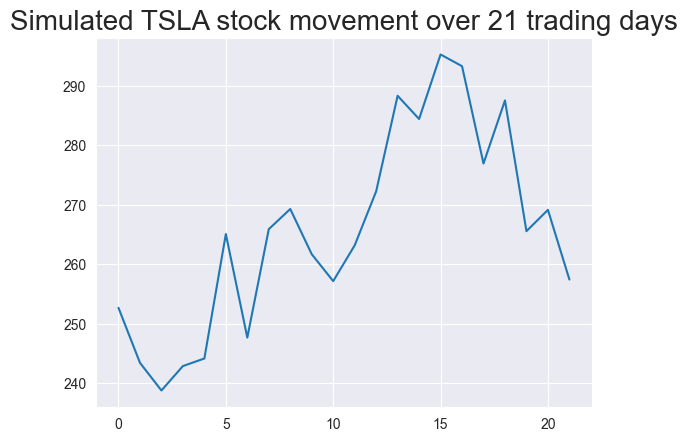

In [25]:
#Simulate the potential movement of TSLA stock over a one month trading period.

S0 =  tsla_stock['Adj Close'].iloc[-1] #Current price of stock
mu =  0 #annual drift rate
sigma = volatility #Volatility
T =  21/252 #Approximately one month worth of trading dates, 21/252 = 1/12
steps =  21 #Simulate 21 trading steps

stock_prices = [S0]
for i in range(21):
    W = np.random.normal()
    previous_price = stock_prices[-1]
    new_price = previous_price * np.exp((mu - sigma**2/2)*(1/252) + sigma*W*np.sqrt((1/252)))
    stock_prices.append(new_price)

plt.plot(stock_prices)
plt.title('Simulated TSLA stock movement over 21 trading days', size = 20)
plt.show()

We simulate more paths of TSLA stock movement through a double-loop.

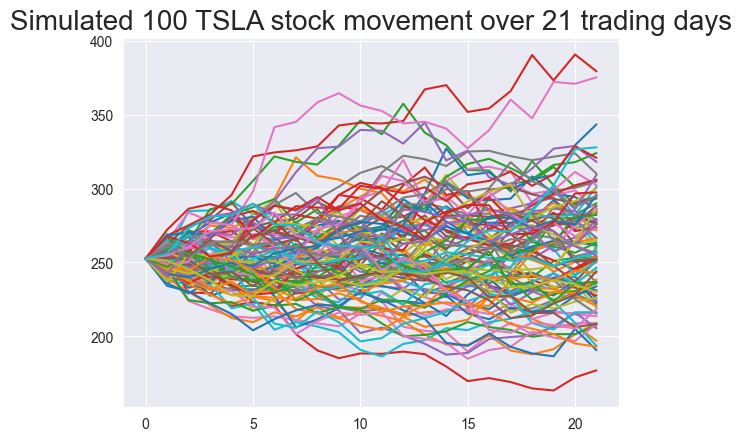

In [27]:
S0 = tsla_stock['Adj Close'].iloc[-1]  # Current price of stock
mu = 0
T = 21/252  # Approximately one month worth of trading dates, 21/252 = 1/12
steps = 21  # Number of steps we will simulate the stock's movement
stock_paths = []
N = 100 #Perform 100 simulations

for _ in range(N):
    stock_prices = [S0]
    for i in range(steps):
        W = np.random.normal(0, 1)
        previous_price = stock_prices[-1]
        new_price = previous_price * np.exp((mu - (sigma**2) / 2) * (1/252) + sigma * np.sqrt(1/252) * W)
        stock_prices.append(new_price)
    stock_paths.append(stock_prices)

stock_paths = np.array(stock_paths)
plt.plot(stock_paths.T)  # Transpose for proper plotting
plt.title(f'Simulated {N} TSLA stock movement over 21 trading days', size=20)
plt.show()


To provide accurate estimates of expected asset prices, we will need to simulate many more stock movements. Simulation through loops will cause an issue of suboptimal computer performance. To dramatically increase our simulation time, we utilize vectorized coding through numpy to simulate the changes in $S(t)$ provided by the stochastic differential equation used to model the random fluctuations in a Geometric Brownian Motion.

In [28]:
# The following function uses vectorized code to simulate a stock price movement.
def geo_paths(S0, T, sigma, steps, N, mu=0):
    """
    Parameters:
    S0: Initial value of the asset/position
    T: Time in years
    sigma: Yearly volatility of the stock
    steps: Number of steps in a simulation
    N: Number of simulations
    mu: Drift rate
    
    Output: Simulated geometric Brownian motion paths of assets/positions based on the inputs.
    """
    
    dt = T / steps
    dW = np.random.normal(size=(steps, N)) #create an array of arrays of random numbers picked from the standard normal distribution
    
    # Calculate the increments in log-returns with drift (mu)
    increments = (mu +  (sigma**2) / 2) * dt + sigma* np.sqrt(dt) * dW 
    
    log_returns = np.cumsum(increments, axis=0)
    ST = S0 * np.exp(log_returns)
    paths = np.insert(ST, 0, S0, axis=0)
    return paths


In [30]:
import timeit #package to measure time elapsed


# Define the parameters
S0 = tsla_stock['Adj Close'].iloc[-1]
sigma = volatility
mu = 0
T = 21/252
steps = 21
N = 1000000

# Define the function for calculating stock paths
def calculate_stock_paths():
    stock_paths = geo_paths(S0, T, sigma, steps, N, mu=mu)

# Time the calculation
execution_time = timeit.timeit(calculate_stock_paths, number=1)

print(f"Time needed to simulate {N} stock movements with {steps} steps: {execution_time:.4f} seconds")


Time needed to simulate 1000000 stock movements with 21 steps: 1.0998 seconds


**Warning!!!** Modeling stock movements as Geometric Brownian motions assumes that the log returns are normally distributed. This may not be the case in certain periods of time and therefore the simulated stock movements may not provide accurate predictions. The Anderson-Darling test is a statistical test whose null hypothesis is that the data is normally distributed. Therefore the Anderson-Darling test measures the probability that a sample space is being drawn from a normal distribution.

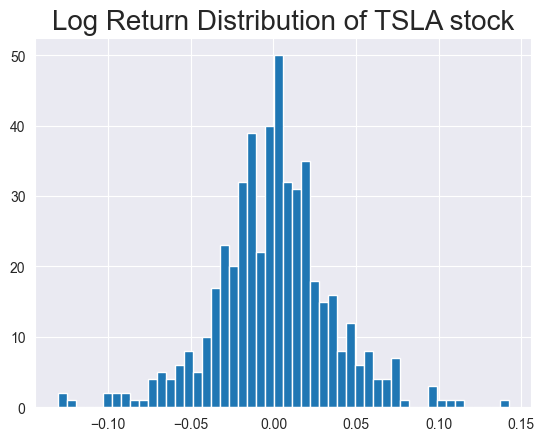

Anderson-Darling Test Statistic: 2.6455
Critical Values:
Level 15.0%: 0.5710
Level 10.0%: 0.6510
Level 5.0%: 0.7810
Level 2.5%: 0.9110
Level 1.0%: 1.0830
---------
Reject the null hypothesis that the log returns follow a normal distribution.


In [34]:
from scipy import stats #package for statistical testing

# Log_return data set
log_returns = tsla_stock['Log_Return'].copy()
log_returns = log_returns.dropna()

plt.hist(log_returns,bins = 50)
plt.title('Log Return Distribution of TSLA stock', size = 20)
plt.show()


# Perform the Anderson-Darling test for normality
result = stats.anderson(log_returns)

# Print the test statistic and critical values
print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}")
print("Critical Values:")
for i, crit_value in enumerate(result.critical_values):
    print(f"Level {result.significance_level[i]}%: {crit_value:.4f}")
    
    
print('---------')

# Check the p-value
if result.statistic < result.critical_values[0]:
    print("The log returns appear follow a normal distribution. Therefore the stock data could be reasonably modeled under the assumption that the log returns follow a normal distribution.")
else:
    print("Reject the null hypothesis that the log returns follow a normal distribution.")